# Experimento Efeito Fotoeléctrico

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.optimize import curve_fit
from scipy.constants import h as plancks, e

h = plancks / e

In [31]:
plt.rcParams['figure.facecolor'] = 'white'
sns.set_theme()

## Dados e funções

In [32]:
colors  = [ 'red', 'yellow', 'green', 'blue', 'violet' ]
cores   = [ 'Vermelho', 'Laranja', 'Verde', 'Azul', 'Violeta' ]
intensities = [ 20, 40, 60, 80, 100 ]

In [72]:
df = pd.read_csv('dados.csv')

In [34]:
def gaussian(x, H, A, m, s): return H + A * np.exp( - (x - m)**2 / (2 * s**2) )

## Espectro de Emissão dos LEDs

In [35]:
df_leds = {}
for color in colors: df_leds[color] = pd.read_csv(f'LEDs/{color}.dat', sep='\t')

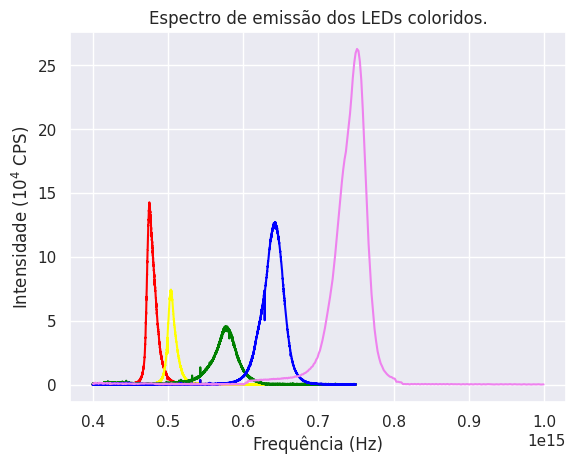

In [36]:
plt.title('Espectro de emissão dos LEDs coloridos.')

for color in colors: sns.lineplot(x=df_leds[color]['Frequencia'], y=df_leds[color]['Intensidade']/1E4, color=color)

plt.xlabel('Frequência (Hz)')
plt.ylabel('Intensidade ($10^{4}$ CPS)')

plt.show()

In [37]:
ranges  = [ [3400, 3900], [2900, 3350], [1600, 2300], [800, 1500], [87, 120] ]
hints   = [
    [ 0, 15E4,  0.47E15, 0.1E14 ],
    [ 0, 7E4,   0.50E15, 0.1E14 ],
    [ 0, 5E4,   0.58E15, 0.1E14 ],
    [ 0, 13E4,  0.64E15, 0.1E14 ],
    [ 0, 21E4,  0.75E15, 0.1E14 ]
  ]
params = {}

In [38]:
for i,color in enumerate(colors):
  popt, pcov = curve_fit(
      gaussian,
      xdata=df_leds[color]['Frequencia'],
      ydata=df_leds[color]['Intensidade'],
      p0=hints[i],
      maxfev=10000
  )
  params[color] = popt

In [39]:
leds_frequency = np.zeros((5, 2))
for i,param in enumerate(params):
  leds_frequency[i] = params[param][2:4]

In [40]:
leds_frequency

array([[4.77674644e+14, 5.60329346e+12],
       [5.05050815e+14, 5.42471839e+12],
       [5.76912157e+14, 1.48767643e+13],
       [6.40654451e+14, 1.35138909e+13],
       [7.46508110e+14, 1.74063409e+13]])

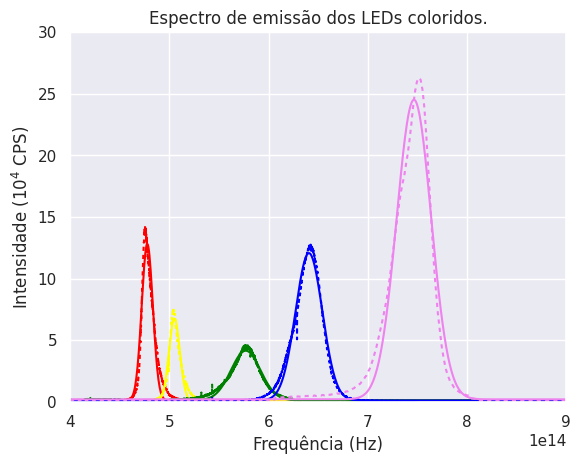

In [41]:
plt.title('Espectro de emissão dos LEDs coloridos.')

x = np.linspace(0.4, 1, 1000) * 1E15

for color in colors:
  sns.lineplot(x=x, y=gaussian(x, params[color][0], params[color][1], params[color][2], params[color][3])/1E4, color=color)
  sns.lineplot(x=df_leds[color]['Frequencia'], y=df_leds[color]['Intensidade']/1E4, dashes=(2,2), color=color)

plt.xlabel('Frequência (Hz)')
plt.ylabel('Intensidade ($10^{4}$ CPS)')
plt.xlim(0.4E15, 0.9E15)
plt.ylim(0, 30)
plt.show()

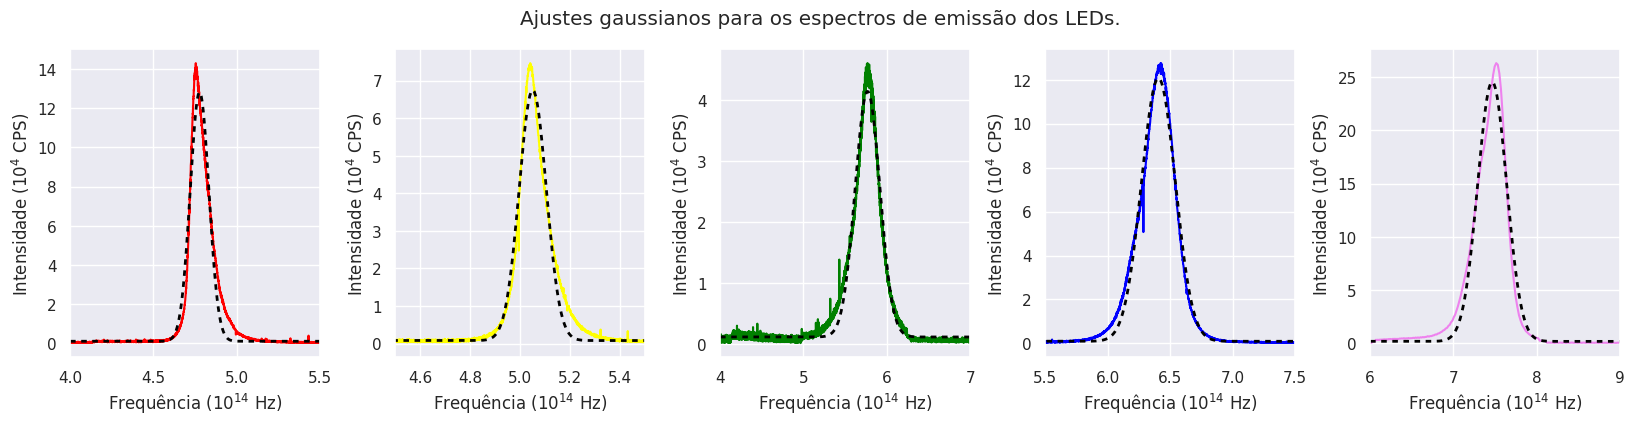

In [42]:
fig, axs = plt.subplots(1, 5, figsize=(20,4), gridspec_kw={ 'wspace': 0.3 })
plt.suptitle('Ajustes gaussianos para os espectros de emissão dos LEDs.')

x = np.linspace(0.4, 1, 1000) * 1E15

xlims = [ [4, 5.5], [4.5, 5.5], [4, 7], [5.5, 7.5], [6, 9] ]
for i,color in enumerate(colors):
  sns.lineplot(x=df_leds[color]['Frequencia']/1E14, y=df_leds[color]['Intensidade']/1E4, color=color, ax=axs[i])
  sns.lineplot(
      x=x/1E14, 
      y=gaussian(x, params[color][0], params[color][1], params[color][2], params[color][3])/1E4, 
      dashes=(2,2), alpha=1, color='black', linewidth=2, ax=axs[i])

  axs[i].set(xlim=xlims[i], xlabel='Frequência ($10^{14}$ Hz)', ylabel='Intensidade ($10^4$ CPS)')

plt.show()

## Ruído (Corrente parasita)

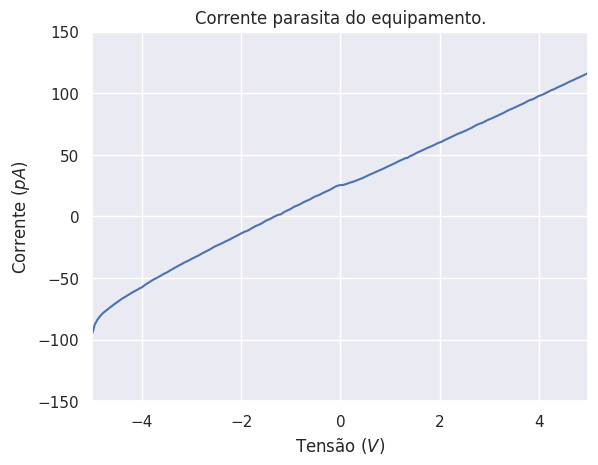

In [43]:
plt.title('Corrente parasita do equipamento.')

sns.lineplot(x=df['Tensao'], y=df['Ruido']*1E12)

plt.xlim(-5, 5)
plt.ylim(-150, 150)
plt.ylabel('Corrente ($p A$)')
plt.xlabel('Tensão ($V$)')
plt.show()

## Corrente x Tensão para os LEDs

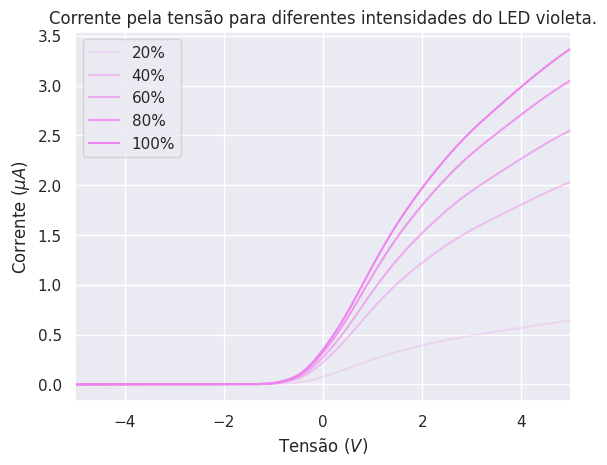

In [44]:
plt.title('Corrente pela tensão para diferentes intensidades do LED violeta.')

for i in intensities:
  sns.lineplot(x=df['Tensao'], y=df[f'Violeta_{i}']*1E6, alpha=i/100, color='violet', label=f'{i}%')

plt.legend()
plt.xlim(-5, 5)
plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($\mu A$)')
plt.show()

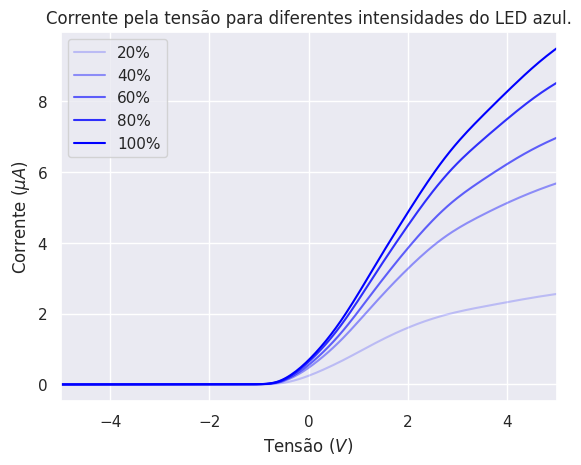

In [45]:
plt.title('Corrente pela tensão para diferentes intensidades do LED azul.')

for i in intensities:
  sns.lineplot(x=df['Tensao'], y=df[f'Azul_{i}']*1E6, alpha=i/100, color='blue', label=f'{i}%')

plt.legend()
plt.xlim(-5, 5)
plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($\mu A$)')
plt.show()

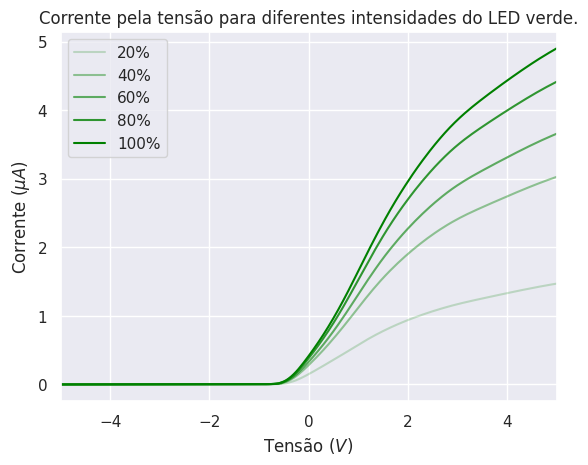

In [46]:
plt.title('Corrente pela tensão para diferentes intensidades do LED verde.')

for i in intensities:
  sns.lineplot(x=df['Tensao'], y=df[f'Verde_{i}']*1E6, alpha=i/100, color='green', label=f'{i}%')

plt.legend()
plt.xlim(-5, 5)
plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($\mu A$)')
plt.show()

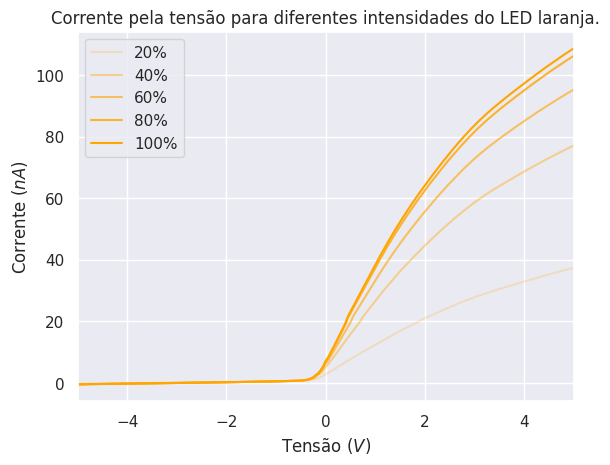

In [47]:
plt.title('Corrente pela tensão para diferentes intensidades do LED laranja.')

for i in intensities:
  sns.lineplot(x=df['Tensao'], y=df[f'Laranja_{i}']*1E9, alpha=i/100, color='orange', label=f'{i}%')

plt.legend()
plt.xlim(-5, 5)
plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($nA$)')
plt.show()

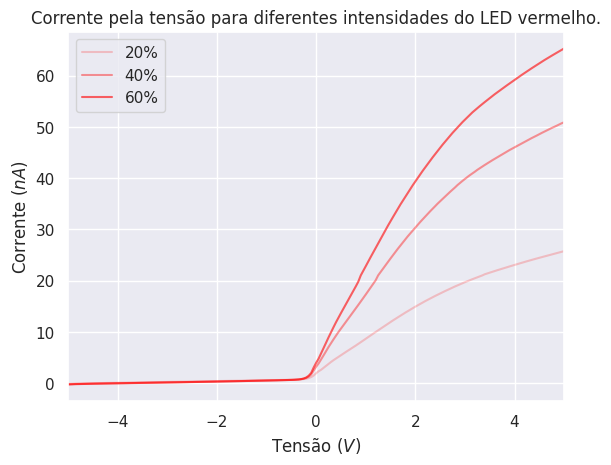

In [48]:
plt.title('Corrente pela tensão para diferentes intensidades do LED vermelho.')

for i in intensities[:3]:
  sns.lineplot(x=df['Tensao'], y=df[f'Vermelho_{i}']*1E9, alpha=i/100, color='red', label=f'{i}%')

plt.legend()
plt.xlim(-5, 5)
plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($nA$)')
plt.show()

## Estudo da tensão de corte

### Método 1

In [76]:
cutoff_voltages_intensity = np.zeros((5, 5))

In [77]:
for i,color in enumerate(cores):
  for j,ints in enumerate(intensities):
    try:
      a = np.array(df[f'{color}_{ints}'] - df['Ruido'])
      cutoff = df['Tensao'][ np.where(np.diff(np.sign(a)))[0][0] + 1]
      cutoff_voltages_intensity[i][j] = cutoff
    except: pass

In [78]:
cutoff_voltages_intensity

array([[5.09199749e-12, 2.10419952e-12, 2.10419952e-12, 0.00000000e+00,
        0.00000000e+00],
       [5.09199749e-12, 5.09199749e-12, 5.09199749e-12, 4.41544537e-12,
        5.09199749e-12],
       [5.09199749e-12, 4.41544537e-12, 4.41544537e-12, 4.41544537e-12,
        5.09199749e-12],
       [7.59926505e-11, 5.57646267e-11, 4.69347621e-11, 4.90447017e-12,
        3.79843498e-12],
       [6.05641758e-12, 4.90447017e-12, 4.90447017e-12, 5.56834365e-12,
        9.01784704e-11]])

In [79]:
cutoff_voltages = cutoff_voltages_intensity.mean(axis=1)

In [80]:
cutoff_voltages

array([1.86007930e-12, 4.95668706e-12, 4.68606622e-12, 3.74789889e-11,
       2.23224344e-11])

In [64]:
popt, pcov = curve_fit(
    lambda x, a, b: x * a + b,
    xdata=leds_frequency.transpose()[0][1:],
    ydata=cutoff_voltages[1:]
)

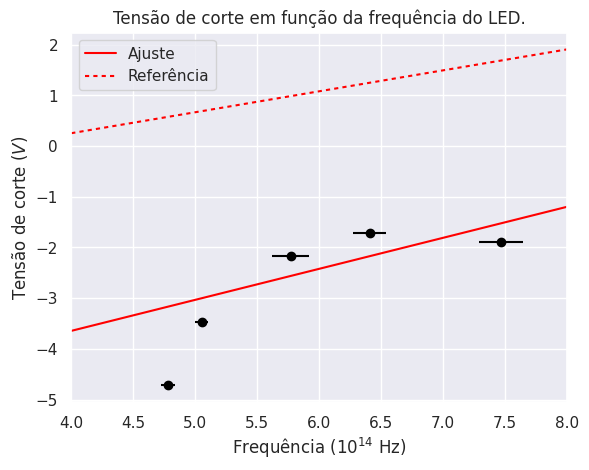

In [67]:
plt.title('Tensão de corte em função da frequência do LED.')

plt.errorbar(
    x=leds_frequency.transpose()[0] / 1E14,
    y=cutoff_voltages,
    xerr=leds_frequency.transpose()[1] / 1E14,
    fmt=' ', marker='o', color='black'
)

x = np.linspace(4, 8, 10) * 1E14
sns.lineplot(x=x/1E14, y=x*popt[0] + popt[1], color='red', label='Ajuste')
sns.lineplot(x=x/1E14, y=x*h -1.4, dashes=(2,2), color='red', label='Referência')

plt.xlim(4, 8)
plt.ylabel('Tensão de corte ($V$)')
plt.xlabel('Frequência ($10^{14}$ Hz)')
plt.show()

In [66]:
popt[0], popt[1]

(6.12193800439282e-15, -6.093958357671023)